# Modelo conv2d

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
import os

# El directorio de trabajo
processDir = './process'

# Directorio para entrenamiento, validacion y test
train_dir = os.path.join(processDir, 'train')
validation_dir = os.path.join(processDir, 'validation')
test_dir = os.path.join(processDir, 'test')


# Modelo

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='softmax'))

Using TensorFlow backend.
W1003 10:57:57.558735  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 10:57:57.937722  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 10:57:58.141178  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 10:57:58.326682  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



# Optimizador

In [4]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W1003 10:58:07.480211  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1003 10:58:07.490185  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



# Generador de datos

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 14530 images belonging to 120 classes.
Found 3025 images belonging to 120 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 120)


# Entrenamiento

In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=test_generator,
      validation_steps=50)

W1003 11:34:07.658806  9284 deprecation.py:323] From C:\work\ia\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1003 11:34:07.796438  9284 deprecation_wrapper.py:119] From C:\work\ia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
100/100 [==============================] - 74s 736ms/step - loss: 4.7905 - acc: 0.0120 - val_loss: 4.7812 - val_acc: 0.0120
Epoch 2/100
100/100 [==============================] - 70s 703ms/step - loss: 4.7851 - acc: 0.0130 - val_loss: 4.7749 - val_acc: 0.0180
Epoch 3/100
100/100 [==============================] - 71s 707ms/step - loss: 4.7711 - acc: 0.0110 - val_loss: 4.7498 - val_acc: 0.0180
Epoch 4/100
100/100 [==============================] - 67s 673ms/step - loss: 4.7451 - acc: 0.0205 - val_loss: 4.7213 - val_acc: 0.0264
Epoch 5/100
100/100 [==============================] - 67s 675ms/step - loss: 4.7101 - acc: 0.0265 - val_loss: 4.6508 - val_acc: 0.0290
Epoch 6/100
100/100 [==============================] - 67s 666ms/step - loss: 4.6756 - acc: 0.0220 - val_loss: 4.6440 - val_acc: 0.0210
Epoch 7/100
100/100 [==============================] - 67s 669ms/step - loss: 4.6403 - acc: 0.0275 - val_loss: 4.5795 - val_acc: 0.0294
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 67s 671ms/step - loss: 4.0429 - acc: 0.0860 - val_loss: 4.0744 - val_acc: 0.0975
Epoch 62/100
100/100 [==============================] - 67s 674ms/step - loss: 4.0589 - acc: 0.0865 - val_loss: 4.0233 - val_acc: 0.0960
Epoch 63/100
100/100 [==============================] - 67s 674ms/step - loss: 4.0574 - acc: 0.0965 - val_loss: 4.0722 - val_acc: 0.0900
Epoch 64/100
100/100 [==============================] - 67s 671ms/step - loss: 3.9948 - acc: 0.0935 - val_loss: 4.1096 - val_acc: 0.0995
Epoch 65/100
100/100 [==============================] - 68s 677ms/step - loss: 4.0266 - acc: 0.0945 - val_loss: 4.1108 - val_acc: 0.0860
Epoch 66/100
100/100 [==============================] - 68s 680ms/step - loss: 3.9615 - acc: 0.1095 - val_loss: 4.0567 - val_acc: 0.0900
Epoch 67/100
100/100 [==============================] - 68s 676ms/step - loss: 4.0187 - acc: 0.0985 - val_loss: 4.0654 - val_acc: 0.0995
Epoch 68/100
100/100 [===================

# Graficos

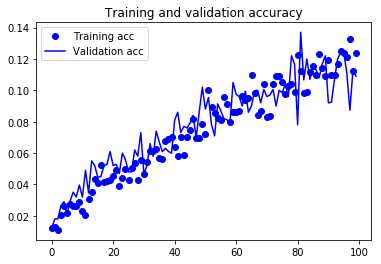

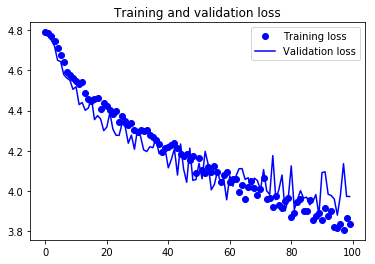

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model.save('tp02_model.h5')